### ⚠️ <span style = "color:red"> Dataset: Student personality scores and writing style </span>

This data record includes 

* File name and word count
* 4 summary language variables
    * analytical thinking      - clout      - authenticity             - emotional tone
* 3 general descriptor categories
    * words per sentence   - % of target words captured by the dictionary    - % of words longer than six letters
    
* 21 standard linguistic dimensions
    * % of words that are pronouns, articles, auxiliary verbs, etc.
* 41 word categories tapping psychological constructs 
    * affect   - cognition    - biological processes   - drives
* 6 personal concern categories 
    * Ex, work   - home   - leisure    - activities
* 5 informal language markers 
    * assents   - fillers   - swear words   - netspeak)
* 12 punctuation categories 
    * periods   - commas, etc. 

Each dictionary entry additionally defines one or more word categories or subdictionaries. 

* Ex - "Cried" is part of five word categories: sadness, negative emotion, overall affect, verbs, & past focus. 
    * If "cried" is found, each of the five subdictionary scores will be incremented
    * All sadness words, belong to “negative emotion” category,& “overall affect words” category 

* Word stems can be captured 
    * Ex -  Dictionary includes stem hungr*. Target words that match the first five letters are counted as an ingestion word - hungry, hungrier, hungriest 
        * The asterisk, denotes acceptance of all letters, hyphens, or numbers following its appearance
        
    

In [2]:
import pandas as pd
import numpy as np
from numpy import mean
import xarray as xr
import scipy
from matplotlib import pyplot as plt
plt.style.use("dark_background")
import warnings
warnings.filterwarnings("ignore")
from matplotlib import style
from scipy import stats
from scipy.stats import shapiro
#import pymannkendall as mk
import seaborn as sns

print("x")

x


In [3]:
CD = pd.read_csv("ClassData_Assignment2.csv")
CDtestRun = CD; print("x")

x



# <span style = "color:red"> REQ 1 </span>

- Assess and understand the data. This will require running summary statistics, correlations and creating scatterplots

In [4]:
display(CD.head(5)) # Ensuring csv read properly

,ID #,Gender,Nscore,Escore,Oscore,Ascore,Cscore,WC,Analytic,Clout,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1,Female,6,22,30,33,41,563,93.82,38.12,...,6.57,0.36,0.00,0.00,0.00,0.89,0.71,1.07,0.36,0.89
1,2,Male,34,28,26,27,20,309,95.91,37.31,...,7.44,0.00,0.00,0.00,0.00,0.65,1.29,0.32,1.29,0.32
2,3,Female,4,24,42,40,32,972,93.41,38.26,...,6.58,0.31,0.93,0.00,0.00,1.34,0.00,1.44,1.03,0.00
3,4,Female,23,32,25,32,28,1275,67.57,34.15,...,3.84,0.39,0.39,0.63,0.08,0.78,1.41,0.94,1.25,0.08
4,5,Female,23,29,34,33,24,500,59.31,48.40,...,2.00,0.00,0.00,0.20,0.00,0.00,0.40,1.80,0.00,0.20


In [5]:
CD = CD.drop(columns = ["WC"]); #Dropping WC Word Count column

# Renaming "ID #", & others, for syntax use & understanding
CD = CD.rename(columns = {"Nscore": "Neuroticism",
                          "Escore": "Extraversion", 
                          "Oscore": "Openness", 
                          "Ascore": "Agreeableness", 
                          "Cscore": "Conscientiousness",
    
                          "ID #": "ID", 
                          "Analytic": "Analytic Thinking", 
                          "Tone": "Emotional Tone", 
                          "Sixltr": "Six Letter", 
                          "Dic": "Dict Words",
                        
                          "funct": "Function Words",
                          "ppron": "Personal Pronoun",
                          "i": "1stPers Singular (i)",
                          "we": "1stPers Plural (we)",
                          "you": "2ndPers (you)",
                          "shehe": "3rdPers Singular (SheHe)",
                          "they": "3rdPers Plural (they)",
                          "ipron": "Impersonal Pronoun",
                          "prep": "Prepositions",
                          "conj": "Conjunctions",
                          "negate": "Negations",
                          
                          "adj": "Adjectives",
                          "compare": "Comparisons",
                          "interrog": "Interrogatives",
                          "quant": "Quantifiers",
                          
                          "affectve": "Affective Process",
                         }
              )

In [6]:
# Sorting dataset by gender, and initializing a df copy

CD = CD.sort_values(by = ["Gender", "ID"], ascending = True);  # Main df

In [7]:
# Running styler to help visualize the categorical groups by color

"Big Five Factor Model"
CD = CD.style.set_properties(subset = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"], **{"background-color": "Darkred"});

"Summary Language Vars"
CD = CD.set_properties(subset = ["Analytic Thinking", "Clout", "Authentic", "Emotional Tone", "WPS", "Six Letter", "Dict Words"], **{"background-color": "coral"})

"Linguistic Dimensions"
CD = CD.set_properties(subset = ["function", "pronoun", "Personal Pronoun", "1stPers Singular (i)", "1stPers Plural (we)", "2ndPers (you)", "3rdPers Singular (SheHe)", "3rdPers Plural (they)", "Impersonal Pronoun", "article", "Prepositions", "auxverb", "adverb", "Conjunctions", "Negations"], **{'background-color': 'DarkBlue'})

"Other Grammar"
CD = CD.set_properties(subset = ["verb", "Adjectives", "Comparisons", "Interrogatives", "number", "Quantifiers"], **{"background-color": "Green"})

"Psych Processes"

"** Affective"
CD = CD.set_properties(subset = ["affect", "posemo", "negemo", "anx", "anger", "sad"], **{"background-color": "Orange"})

"** Social"
CD = CD.set_properties(subset = ["social", "family", "friend", "female", "male"], **{"background-color": "Teal"})

"** Cognitive"
CD = CD.set_properties(subset = ["cogproc", "insight", "cause", "discrep", "tentat", "certain", "differ"], **{"background-color": "Maroon"})

"** Perceptual"
CD = CD.set_properties(subset = ["percept", "see", "hear", "feel"], **{"background-color": "MediumPurple"})

"** Biological"
CD = CD.set_properties(subset = ["bio", "body", "health", "sexual", "ingest"], **{"background-color": "DimGray"})

"** Drives"
CD = CD.set_properties(subset = ["drives", "affiliation", "achieve", "power", "reward", "risk"], **{"background-color": "PaleVioletRed"})

"** Time Orientation"
CD = CD.set_properties(subset = ["focuspast", "focuspresent", "focusfuture"], **{"background-color": "DarkOliveGreen"})

"** Relativity"
CD = CD.set_properties(subset = ["relativ", "motion", "space", "time"], **{"background-color": "Peru"})

"** Personal Concerns"
CD = CD.set_properties(subset = ["work", "leisure", "home", "money", "relig", "death"], **{"background-color": "RoyalBlue"})

"** Informal Language"
CD = CD.set_properties(subset = ["informal", "swear", "netspeak", "assent", "nonflu", "filler"], **{"background-color": "SaddleBrown"})

CD  

,ID,Gender,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Analytic Thinking,Clout,Authentic,Emotional Tone,WPS,Six Letter,Dict Words,function,pronoun,Personal Pronoun,1stPers Singular (i),1stPers Plural (we),2ndPers (you),3rdPers Singular (SheHe),3rdPers Plural (they),Impersonal Pronoun,article,Prepositions,auxverb,adverb,Conjunctions,Negations,verb,Adjectives,Comparisons,Interrogatives,number,Quantifiers,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1,Female,6,22,30,33,41,93.820000,38.120000,47.360000,48.870000,18.160000,23.270000,81.880000,49.910000,9.770000,4.440000,3.370000,0.360000,0.180000,0.360000,0.180000,5.330000,13.680000,13.320000,5.510000,3.200000,7.100000,0.360000,11.900000,2.840000,2.130000,2.310000,2.310000,2.660000,3.730000,2.490000,1.240000,0.180000,0.180000,0.000000,4.440000,0.180000,0.000000,0.530000,0.000000,11.190000,1.780000,2.310000,1.070000,3.370000,0.890000,4.260000,3.020000,1.600000,0.530000,0.360000,3.020000,0.890000,0.000000,0.000000,2.130000,6.040000,1.420000,2.490000,1.420000,1.070000,0.890000,1.070000,8.350000,0.710000,12.610000,2.490000,7.460000,3.200000,2.310000,3.910000,0.360000,0.000000,0.000000,0.000000,0.360000,0.000000,0.360000,0.000000,0.000000,0,16.340000,5.510000,6.570000,0.360000,0.000000,0.000000,0.000000,0.890000,0.710000,1.070000,0.360000,0.890000
2,3,Female,4,24,42,40,32,93.410000,38.260000,58.730000,86.410000,30.380000,37.040000,80.860000,41.360000,7.820000,5.560000,5.350000,0.100000,0.000000,0.000000,0.100000,2.260000,6.480000,15.840000,4.120000,2.060000,7.720000,0.000000,6.890000,4.220000,1.850000,0.720000,1.540000,0.930000,4.120000,3.810000,0.310000,0.100000,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,5.760000,2.880000,2.060000,0.510000,0.510000,0.210000,0.210000,1.030000,0.100000,0.000000,0.310000,0.210000,0.100000,0.100000,0.000000,0.000000,10.390000,0.930000,4.420000,4.840000,1.540000,0.210000,2.570000,5.140000,1.030000,14.400000,2.670000,9.160000,2.470000,18.110000,0.210000,0.000000,4.220000,0.000000,0.000000,0.210000,0.000000,0.000000,0.100000,0.100000,0,15.640000,4.010000,6.580000,0.310000,0.930000,0.000000,0.000000,1.340000,0.000000,1.440000,1.030000,0.000000
3,4,Female,23,32,25,32,28,67.570000,34.150000,68.680000,70.090000,20.900000,25.570000,81.880000,51.920000,15.060000,9.650000,7.920000,0.000000,0.550000,0.550000,0.630000,5.410000,5.730000,15.060000,5.960000,3.290000,9.410000,1.180000,11.530000,5.330000,3.690000,1.490000,0.710000,1.570000,4.710000,3.450000,1.100000,0.310000,0.080000,0.390000,7.920000,0.390000,0.390000,0.240000,0.710000,11.610000,3.690000,1.020000,1.250000,1.800000,1.490000,3.450000,2.750000,0.630000,0.710000,0.710000,1.960000,0.630000,0.310000,0.000000,0.630000,4.860000,1.410000,0.940000,1.730000,1.180000,0.080000,2.590000,6.200000,0.550000,10.670000,0.940000,6.270000,3.610000,3.450000,1.730000,0.240000,0.160000,0.240000,0.000000,0.240000,0.000000,0.080000,0.000000,0.160000,0,14.120000,4.310000,3.840000,0.390000,0.390000,0.630000,0.080000,0.780000,1.410000,0.940000,1.250000,0.080000
4,5,Female,23,29,34,33,24,59.310000,48.400000,50.000000,70.900000,21.740000,17.800000,89.400000,56.200000,17.800000,11.200000,8.800000,0.600000,0.400000,1.000000,0.400000,6.600000,6.000000,15.600000,9.600000,5.000000,5.200000,1.200000,18.200000,3.400000,2.000000,1.800000,0.800000,2.000000,4.600000,3.400000,1.000000,0.600000,0.400000,0.000000,11.600000,1.000000,0.200000,3.000000,2.000000,13.600000,2.800000,2.000000,4.000000,1.400000,1.200000,3.000000,1.600000,0.600000,0.200000,0.800000,0.200000,0.200000,0.000000,0.000000,0.000000,9.600000,4.000000,

In [8]:
print("Total indidvidual Females & Males \n"); groupGender = CD.data.groupby("Gender"); groupGender.count() # Confirming individual tally

Total indidvidual Females & Males 



,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Analytic Thinking,Clout,Authentic,Emotional Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
Gender,,,,,,,,,,,,,,,,,,,,,
Female,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Male,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [9]:
genderMean = groupGender.mean(); genderMean.style # Mean values per column, split by gender

,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Analytic Thinking,Clout,Authentic,Emotional Tone,WPS,Six Letter,Dict Words,function,pronoun,Personal Pronoun,1stPers Singular (i),1stPers Plural (we),2ndPers (you),3rdPers Singular (SheHe),3rdPers Plural (they),Impersonal Pronoun,article,Prepositions,auxverb,adverb,Conjunctions,Negations,verb,Adjectives,Comparisons,Interrogatives,number,Quantifiers,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,16.631579,24.789474,26.631579,32.894737,28.842105,28.105263,79.550000,39.723158,61.111053,64.613158,20.701053,26.136316,83.502105,49.260000,12.623158,8.713158,6.737895,0.334211,0.364737,0.741053,0.535789,3.910526,7.206316,15.282105,5.945789,3.763158,6.556842,0.883158,11.946316,4.330000,2.654211,1.305263,1.400526,2.057895,4.693684,3.338421,1.256842,0.273158,0.251053,0.277368,6.608421,0.431053,0.220000,0.851053,0.485789,11.341579,3.307368,2.021579,1.357368,1.892105,1.264211,2.554737,2.226316,0.940000,0.466316,0.464737,1.336842,0.427895,0.321579,0.107368,0.319474,8.316316,2.078421,2.734211,2.942105,1.330000,0.469474,3.777895,6.822105,0.618421,12.687895,1.561579,6.954211,4.373158,7.127895,1.194211,0.212105,0.598421,0.091579,0.000000,0.170526,0.010000,0.028421,0.039474,0.102105,0.000000,14.313684,5.175789,5.327895,0.189474,0.205789,0.140000,0.037368,0.881579,0.834211,0.854737,0.498947,0.170526
Male,20.588235,21.000000,27.294118,33.058824,29.941176,30.529412,89.171176,40.221176,57.745294,63.675882,23.477059,29.723529,80.311176,45.989412,10.714118,7.490588,5.927647,0.418235,0.167059,0.464118,0.513529,3.222941,7.407647,15.933529,4.631765,3.238824,5.842353,0.561765,9.638235,5.027059,2.801176,0.998824,1.448235,2.228235,4.355882,3.194118,1.082941,0.155294,0.194706,0.221176,5.054118,0.437059,0.165294,0.435294,0.490000,10.461765,3.502353,2.177647,1.188235,1.463529,1.368235,1.641765,1.635882,0.684118,0.270588,0.352941,1.332353,0.395882,0.526471,0.105882,0.090000,8.282353,1.774706,3.241176,2.560588,1.527059,0.551765,3.462941,5.124706,0.715294,13.025882,1.558824,7.222353,4.345294,8.501765,0.988824,0.375882,0.598824,0.080588,0.095294,0.213529,0.005882,0.038824,0.030588,0.129412,0.000000,13.307647,4.549412,5.161176,0.156471,0.091176,0.095882,0.018235,1.174706,0.708824,0.762353,0.410000,0.180588


In [10]:
groupGender.agg([np.mean, np.median, np.std, np.var]).style # Aggregated stat values per column, split by gender

#df2.data.loc[:].style.highlight_max(axis = 1, props = 'color:white; font-weight:bold; background-color:darkblue;')

In [11]:
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.get_group.html

# Created new df split by gender
print("Female only dataset")
femaleDF = CD.data.groupby(CD.data.Gender).get_group("Female").reset_index(); femaleDF.describe()

Female only dataset


,index,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Analytic Thinking,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,15.631579,16.631579,24.789474,26.631579,32.894737,28.842105,28.105263,79.550000,39.723158,61.111053,...,5.327895,0.189474,0.205789,0.140000,0.037368,0.881579,0.834211,0.854737,0.498947,0.170526
std,10.578860,10.578860,10.793923,6.465382,6.154445,8.532703,7.377855,14.747972,16.224508,23.846568,...,1.936206,0.186383,0.320751,0.188768,0.084053,0.725559,0.956593,0.481345,0.434280,0.285569
min,0.000000,1.000000,4.000000,12.000000,17.000000,14.000000,16.000000,51.130000,12.100000,13.060000,...,1.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000
25%,5.500000,6.500000,21.000000,23.000000,30.000000,20.500000,23.500000,67.455000,31.220000,46.670000,...,4.115000,0.000000,0.000000,0.000000,0.000000,0.445000,0.275000,0.575000,0.090000,0.000000
50%,17.000000,18.000000,23.000000,28.000000,32.000000,31.000000,28.000000,82.170000,38.880000,60.720000,...,5.070000,0.170000,0.090000,0.000000,0.000000,0.840000,0.610000,0.800000,0.360000,0.000000
75%,22.500000,23.500000,29.500000,31.000000,37.500000,34.000000,33.000000,92.315000,47.660000,76.340000,...,6.575000,0.330000,0.340000,0.245000,0.000000,1.045000,0.955000,1.005000,0.850000,0.205000
max,35.000000,36.000000,47.000000,37.000000,42.000000,44.000000,41.000000,95.120000,73.510000,97.030000,...,9.090000,0.630000,1.110000,0.630000,0.310000,3.350000,3.480000,1.800000,1.250000,0.950000


In [12]:
# Created new df split by gender
print("Male only dataset")
maleDF = CD.data.groupby(CD.data.Gender).get_group("Male").reset_index(); maleDF.describe()

Male only dataset


,index,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Analytic Thinking,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000
mean,19.588235,20.588235,21.000000,27.294118,33.058824,29.941176,30.529412,89.171176,40.221176,57.745294,...,5.161176,0.156471,0.091176,0.095882,0.018235,1.174706,0.708824,0.762353,0.41000,0.180588
std,10.398671,10.398671,9.943591,6.059751,4.322479,5.595429,5.724046,8.517146,19.990836,23.992020,...,1.232725,0.232888,0.112854,0.175074,0.075186,0.861119,0.840066,0.838075,0.41102,0.255624
min,1.000000,2.000000,4.000000,17.000000,25.000000,20.000000,20.000000,67.310000,17.890000,5.640000,...,3.050000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.00000,0.000000
25%,10.000000,11.000000,14.000000,25.000000,31.000000,27.000000,26.000000,83.410000,29.550000,46.130000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.460000,0.120000,0.320000,0.20000,0.000000
50%,19.000000,20.000000,21.000000,27.000000,33.000000,31.000000,31.000000,92.220000,33.340000,60.070000,...,5.340000,0.000000,0.000000,0.000000,0.000000,1.080000,0.400000,0.500000,0.31000,0.000000
75%,28.000000,29.000000,27.000000,30.000000,37.000000,34.000000,34.000000,95.450000,45.490000,70.730000,...,5.710000,0.200000,0.200000,0.190000,0.000000,1.360000,1.240000,0.590000,0.50000,0.320000
max,34.000000,35.000000,41.000000,40.000000,40.000000,39.000000,39.000000,97.400000,91.340000,98.170000,...,7.440000,0.770000,0.310000,0.610000,0.310000,3.670000,3.190000,3.160000,1.29000,0.690000


In [13]:
print("FEMALE: Checking the amount of times zero occurs in each column to remove/ clean dataset\n")

fZeroCheck = (femaleDF == 0).sum(); print(fZeroCheck.to_string())

#z = (female.data == 0).sum(); print(z.to_string())

FEMALE: Checking the amount of times zero occurs in each column to remove/ clean dataset

index                        1
ID                           0
Gender                       0
Neuroticism                  0
Extraversion                 0
Openness                     0
Agreeableness                0
Conscientiousness            0
Analytic Thinking            0
Clout                        0
Authentic                    0
Emotional Tone               0
WPS                          0
Six Letter                   0
Dict Words                   0
function                     0
pronoun                      0
Personal Pronoun             0
1stPers Singular (i)         1
1stPers Plural (we)          6
2ndPers (you)                7
3rdPers Singular (SheHe)     7
3rdPers Plural (they)        2
Impersonal Pronoun           0
article                      0
Prepositions                 0
auxverb                      0
adverb                       0
Conjunctions                 0
Negations  

In [14]:
print("MALE: Checking the amount of times zero occurs in each column to remove/ clean dataset\n")

mZeroCheck = (maleDF == 0).sum(); print(mZeroCheck.to_string())

#z = (female.data == 0).sum(); print(z.to_string())

MALE: Checking the amount of times zero occurs in each column to remove/ clean dataset

index                        0
ID                           0
Gender                       0
Neuroticism                  0
Extraversion                 0
Openness                     0
Agreeableness                0
Conscientiousness            0
Analytic Thinking            0
Clout                        0
Authentic                    0
Emotional Tone               0
WPS                          0
Six Letter                   0
Dict Words                   0
function                     0
pronoun                      0
Personal Pronoun             0
1stPers Singular (i)         0
1stPers Plural (we)          3
2ndPers (you)                9
3rdPers Singular (SheHe)    11
3rdPers Plural (they)        2
Impersonal Pronoun           0
article                      0
Prepositions                 0
auxverb                      0
adverb                       0
Conjunctions                 0
Negations    

In [15]:
#CD = CD.data.drop(columns = ["filler", "OtherP"]); # Cleaning dataset

In [16]:
#CDtest.style.bar(color = 'gold')
# https://pandas.pydata.org/docs/user_guide/style.html

#CDtest.style.format("{:.3f}", na_rep = "")\
#         .bar(align = 0, vmin = -2.5, vmax = 2.5, cmap = "cool", height = 25, width = 60, props = "width: 120px; border-right: 1px solid black;")\
#         .text_gradient(cmap = "pink", vmin = -2.5, vmax = 2.5)

In [17]:
print("Running Correlations on entire dataset: FEMALE \nHighlighting Rows x Columns with strongest correlation (1.0 == greatest correlation, -1.0 == worst)")

#https://www.w3schools.com/python/pandas/pandas_correlations.asp

fCorr = femaleDF.corr(method = "pearson", numeric_only = True);

cdCorrColorMap = sns.light_palette("darkgreen", as_cmap = True);

fCorr.style.background_gradient(cmap = cdCorrColorMap)

Running Correlations on entire dataset: FEMALE 
Highlighting Rows x Columns with strongest correlation (1.0 == greatest correlation, -1.0 == worst)


In [18]:
print("Running Correlations on entire dataset: MALE \nHighlighting Rows x Columns with strongest correlation (1.0 == greatest correlation, -1.0 == worst)")

mCorr = maleDF.corr(method = "pearson", numeric_only = True);

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mCorr.style.background_gradient(cmap = cdCorrColorMap)

Running Correlations on entire dataset: MALE 
Highlighting Rows x Columns with strongest correlation (1.0 == greatest correlation, -1.0 == worst)


In [19]:
print("FEMALE: Checking the amount of times correlation values are > 0.05 in each column to potentially remove/ clean dataset columns \n")

fCorrCheck = (fCorr > 0.5).sum(); print(fCorrCheck.to_string())

#corrCheck = (CDtest < 0.5).sum(); , corrCheck.to_string()

FEMALE: Checking the amount of times correlation values are > 0.05 in each column to potentially remove/ clean dataset columns 

index                        6
ID                           6
Neuroticism                  1
Extraversion                 2
Openness                     3
Agreeableness                4
Conscientiousness            2
Analytic Thinking            2
Clout                        5
Authentic                   11
Emotional Tone               3
WPS                          7
Six Letter                   5
Dict Words                  16
function                    19
pronoun                     15
Personal Pronoun            16
1stPers Singular (i)        10
1stPers Plural (we)          3
2ndPers (you)               10
3rdPers Singular (SheHe)    15
3rdPers Plural (they)       12
Impersonal Pronoun           5
article                      5
Prepositions                 2
auxverb                      7
adverb                      10
Conjunctions                 3
Neg

In [20]:
print("MALE: Checking the amount of times correlation values are > 0.05 in each column to potentially remove/ clean dataset columns \n")

mCorrCheck = (mCorr > 0.5).sum(); print(mCorrCheck.to_string())

MALE: Checking the amount of times correlation values are > 0.05 in each column to potentially remove/ clean dataset columns 

index                        4
ID                           4
Neuroticism                  6
Extraversion                 7
Openness                     1
Agreeableness                1
Conscientiousness            1
Analytic Thinking            5
Clout                       19
Authentic                    6
Emotional Tone               4
WPS                          4
Six Letter                   5
Dict Words                  19
function                    16
pronoun                     18
Personal Pronoun            15
1stPers Singular (i)         6
1stPers Plural (we)          8
2ndPers (you)                8
3rdPers Singular (SheHe)    21
3rdPers Plural (they)        8
Impersonal Pronoun          15
article                      4
Prepositions                 4
auxverb                     23
adverb                      16
Conjunctions                 9
Negat

In [21]:
fPersona = femaleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Emotional Tone", "WPS", "Six Letter"]]

fPersona1 = fPersona.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("darkgreen", as_cmap = True);

fPersona1.style.background_gradient(cmap = cdCorrColorMap);

In [22]:
print("Checking Higher Correlated categories")

fP = femaleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Emotional Tone", "WPS", "Six Letter", "affect", 
            "Prepositions",
            "space",
            "focusfuture",
            "focuspast",
            "motion"]]

fPC = fP.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("green", as_cmap = True);

fPC.style.background_gradient(cmap = cdCorrColorMap)

Checking Higher Correlated categories


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Emotional Tone,WPS,Six Letter,affect,Prepositions,space,focusfuture,focuspast,motion
ID,1.000000,0.310175,-0.115811,-0.039027,-0.269638,-0.371747,0.339734,-0.283065,-0.054347,0.186582,0.001107,0.038499,-0.043237,0.608598,-0.234578
Neuroticism,0.310175,1.000000,-0.154816,-0.092345,-0.559548,-0.248058,-0.039163,-0.406910,-0.330661,-0.012147,-0.000316,-0.307060,-0.130730,0.228762,-0.454384
Extraversion,-0.115811,-0.154816,1.000000,0.085535,0.659505,0.045116,-0.147473,0.428771,0.136563,0.371576,0.035484,-0.091503,0.288372,-0.430131,-0.204725
Openness,-0.039027,-0.092345,0.085535,1.000000,0.301173,-0.193057,-0.207008,0.427709,0.257053,-0.092163,0.576940,0.572487,0.224432,-0.080878,-0.084835
Agreeableness,-0.269638,-0.559548,0.659505,0.301173,1.000000,-0.039433,0.030013,0.701974,0.392157,0.380189,0.270605,0.225447,0.579698,-0.462139,0.115282
Conscientiousness,-0.371747,-0.248058,0.045116,-0.193057,-0.039433,1.000000,-0.302766,-0.048322,0.048110,0.012110,-0.237090,0.039299,0.109724,-0.247763,0.632364
Emotional Tone,0.339734,-0.039163,-0.147473,-0.207008,0.030013,-0.302766,1.000000,0.194324,-0.023987,-0.137722,-0.097859,0.193021,-0.197067,0.295011,0.128703
WPS,-0.283065,-0.406910,0.428771,0.427709,0.701974,-0.048322,0.194324,1.000000,0.558262,0.085058,0.362268,0.135137,0.157880,-0.193248,0.063612
Six Letter,-0.054347,-0.330661,0.136563,0.257053,0.392157,0.048110,-0.023987,0.558262,1.000000,-0.168086,0.367893,0.094271,0.075752,-0.351231,0.073479
affect,0.186582,-0.012147,0.371576,-0.092163,0.380189,0.012110,-0.137722,0.085058,-0.168086,1.000000,0.175616,0.099257,0.506134,-0.041019,0.120112


In [23]:
mPersona = maleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Emotional Tone", "WPS", "Six Letter"]].corr(method = "pearson", numeric_only = True)

mPersona1 = mPersona.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mPersona1.style.background_gradient(cmap = cdCorrColorMap);

In [24]:
print("Checking Higher Correlated categories")

mP1 = maleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Emotional Tone", "WPS", "Six Letter", 
            "affect", 
            "1stPers Plural (we)",
            "Adjectives",
            "Comparisons",
            "discrep",
            "Quote",
            "family",
            "female",
            "sexual",
            "home",
            "SemiC",
            "Apostro"]]

mPC2 = mP1.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mPC2.style.background_gradient(cmap = cdCorrColorMap)


Checking Higher Correlated categories


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Emotional Tone,WPS,Six Letter,affect,1stPers Plural (we),Adjectives,Comparisons,discrep,Quote,family,female,sexual,home,SemiC,Apostro
ID,1.000000,-0.106987,-0.311384,0.160479,-0.179827,-0.062260,0.156993,-0.309739,-0.342086,-0.121028,0.050982,-0.188295,0.086531,-0.020492,0.004091,-0.111878,0.164978,0.151095,-0.118057,-0.337217,0.139535
Neuroticism,-0.106987,1.000000,-0.320509,-0.465322,-0.262857,-0.180085,-0.219468,0.421482,-0.044240,0.118365,0.519589,0.504878,0.574839,0.512669,0.513796,-0.340763,-0.392519,-0.434803,-0.198197,0.111948,-0.365919
Extraversion,-0.311384,-0.320509,1.000000,0.144852,0.359982,0.117757,0.050603,-0.132517,-0.228291,0.266869,-0.222976,0.110304,-0.037192,0.101036,0.084910,0.693934,0.669337,0.652744,0.645033,0.569748,0.604485
Openness,0.160479,-0.465322,0.144852,1.000000,0.201714,0.074445,0.173295,0.188005,0.469644,-0.189966,-0.221447,-0.611860,-0.488781,-0.185451,-0.454379,0.135852,0.091205,0.138365,-0.238830,-0.100087,-0.001593
Agreeableness,-0.179827,-0.262857,0.359982,0.201714,1.000000,-0.203863,0.487266,-0.196006,0.021235,0.298961,-0.133586,-0.279844,-0.030993,-0.260211,0.004771,0.335010,0.266430,0.261943,0.249194,0.253495,0.293380
Conscientiousness,-0.062260,-0.180085,0.117757,0.074445,-0.203863,1.000000,0.014594,0.346477,0.137247,0.216542,-0.174347,-0.506589,-0.371615,0.311805,-0.224331,-0.125488,-0.168079,-0.158376,-0.352989,0.339543,0.069166
Emotional Tone,0.156993,-0.219468,0.050603,0.173295,0.487266,0.014594,1.000000,-0.172249,-0.138572,0.374745,-0.083230,-0.330212,-0.367121,-0.444365,-0.276205,0.317358,0.326382,0.389034,0.093837,0.299102,0.510834
WPS,-0.309739,0.421482,-0.132517,0.188005,-0.196006,0.346477,-0.172249,1.000000,0.444633,-0.165263,0.286074,-0.177598,-0.150613,0.420170,-0.275999,-0.394426,-0.423031,-0.442965,-0.487724,0.199962,-0.342540
Six Letter,-0.342086,-0.044240,-0.228291,0.469644,0.021235,0.137247,-0.138572,0.444633,1.000000,-0.492343,-0.268120,-0.346365,-0.424370,-0.176463,-0.186655,-0.383826,-0.480283,-0.421324,-0.466824,-0.338914,-0.580385
affect,-0.121028,0.118365,0.266869,-0.189966,0.298961,0.216542,0.374745,-0.165263,-0.492343,1.000000,0.222196,-0.021147,0.024127,0.196544,0.303717,0.371452,0.155622,0.170889,0.137786,0.543334,0.516465


In [25]:
mP = maleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", "Emotional Tone", "WPS", "Six Letter", "affect", 
            "posemo",
            "negemo",
            "anx",
            "anger",
            "sad",
            "social",
            "family",
            "insight",
            "percept",
            "see",
            "hear",
            "feel",
            "drives",
            "affiliation",
            "focuspast",
            "focuspresent",
            "focusfuture",
            "time"]]

mPC = mP.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mPC.style.background_gradient(cmap = cdCorrColorMap)

,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Emotional Tone,WPS,Six Letter,affect,posemo,negemo,anx,anger,sad,social,family,insight,percept,see,hear,feel,drives,affiliation,focuspast,focuspresent,focusfuture,time
ID,1.000000,-0.106987,-0.311384,0.160479,-0.179827,-0.062260,0.156993,-0.309739,-0.342086,-0.121028,-0.030057,-0.231551,0.040676,0.079170,-0.177919,0.144206,-0.111878,-0.203102,0.388362,0.429234,0.023328,0.571037,-0.241831,-0.055902,0.343549,0.070525,-0.015094,0.305380
Neuroticism,-0.106987,1.000000,-0.320509,-0.465322,-0.262857,-0.180085,-0.219468,0.421482,-0.044240,0.118365,-0.024000,0.274823,-0.032147,-0.048897,-0.179889,-0.046829,-0.340763,-0.218290,0.028377,0.152708,-0.107982,-0.452257,0.485634,0.094850,-0.017669,0.015147,-0.138906,-0.258303
Extraversion,-0.311384,-0.320509,1.000000,0.144852,0.359982,0.117757,0.050603,-0.132517,-0.228291,0.266869,0.225837,0.252904,0.451077,0.185743,0.138230,0.466684,0.693934,0.119118,0.083310,0.108720,0.052034,-0.145762,-0.081758,0.196319,-0.180433,0.441202,0.092215,0.242638
Openness,0.160479,-0.465322,0.144852,1.000000,0.201714,0.074445,0.173295,0.188005,0.469644,-0.189966,-0.045726,-0.296723,-0.133526,0.008320,-0.182031,-0.157244,0.135852,0.148242,-0.214404,0.059262,-0.185680,-0.145554,-0.110464,-0.115876,0.254362,-0.430126,-0.059143,-0.152702
Agreeableness,-0.179827,-0.262857,0.359982,0.201714,1.000000,-0.203863,0.487266,-0.196006,0.021235,0.298961,0.472682,-0.043937,-0.085675,-0.149417,0.208022,0.271396,0.335010,-0.071939,-0.227161,-0.310560,0.170532,-0.004454,-0.198569,0.061655,-0.266607,0.394541,-0.271972,-0.219134
Conscientiousness,-0.062260,-0.180085,0.117757,0.074445,-0.203863,1.000000,0.014594,0.346477,0.137247,0.216542,0.156872,0.199400,0.316395,0.251872,0.153720,0.052093,-0.125488,0.469984,-0.161990,-0.164435,-0.279073,0.134744,0.081636,0.240234,-0.256874,0.103118,0.445389,-0.153296
Emotional Tone,0.156993,-0.219468,0.050603,0.173295,0.487266,0.014594,1.000000,-0.172249,-0.138572,0.374745,0.741317,-0.336320,0.195650,-0.414711,0.011842,0.408551,0.317358,0.041762,-0.264802,-0.252265,-0.388619,0.373059,0.061620,0.236249,-0.329268,0.522174,0.012968,-0.038305
WPS,-0.309739,0.421482,-0.132517,0.188005,-0.196006,0.346477,-0.172249,1.000000,0.444633,-0.165263,-0.191621,-0.054882,-0.202590,-0.176448,-0.237568,-0.294807,-0.394426,0.417310,-0.305483,-0.139992,-0.311489,-0.555862,0.200733,-0.035801,-0.023950,-0.216308,-0.340945,-0.465183
Six Letter,-0.342086,-0.044240,-0.228291,0.469644,0.021235,0.137247,-0.138572,0.444633,1.000000,-0.492343,-0.411334,-0.391285,-0.568014,-0.369073,-0.300413,-0.652462,-0.383826,0.327497,-0.744170,-0.531346,-0.366825,-0.505896,0.146282,-0.391113,-0.278401,-0.621929,-0.161264,-0.749408
affect,-0.121028,0.118365,0.266869,-0.189966,0.298961,0.216542,0.374745,-0.165263,-0.492343,1.000000,0.897665,0.745148,0.699745,0.416935,0.591662,0.691055,0.371452,-0.244878,0.199170,0.030323,0.139117,0.224141,0.387626,0.757804,-0.232780,0.553719,0.491913,0.128700


In [26]:
print("Summary stats: Female Personality groups, Tone, & word metrics")
fPersona.describe()

Summary stats: Female Personality groups, Tone, & word metrics


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Emotional Tone,WPS,Six Letter
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,16.631579,24.789474,26.631579,32.894737,28.842105,28.105263,64.613158,20.701053,26.136316
std,10.578860,10.793923,6.465382,6.154445,8.532703,7.377855,24.732439,4.391617,7.169568
min,1.000000,4.000000,12.000000,17.000000,14.000000,16.000000,1.000000,13.830000,17.280000
25%,6.500000,21.000000,23.000000,30.000000,20.500000,23.500000,51.850000,16.845000,20.610000
50%,18.000000,23.000000,28.000000,32.000000,31.000000,28.000000,70.090000,21.040000,24.080000
75%,23.500000,29.500000,31.000000,37.500000,34.000000,33.000000,82.895000,23.125000,32.255000
max,36.000000,47.000000,37.000000,42.000000,44.000000,41.000000,99.000000,30.380000,39.440000


In [27]:
print("Summary stats: Male Personality groups, Tone, & word metrics")
mPersona.describe()

Summary stats: Male Personality groups, Tone, & word metrics


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Emotional Tone,WPS,Six Letter
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.000577,-0.019776,0.075610,0.216346,0.136405,0.138257,0.150274,0.176676,0.146619
std,0.419520,0.455037,0.416069,0.383110,0.421620,0.364749,0.385467,0.422994,0.423435
min,-0.342086,-0.465322,-0.320509,-0.465322,-0.262857,-0.203863,-0.219468,-0.309739,-0.342086
25%,-0.309739,-0.262857,-0.228291,0.144852,-0.196006,-0.062260,-0.138572,-0.172249,-0.138572
50%,-0.106987,-0.180085,0.050603,0.173295,0.021235,0.074445,0.050603,0.188005,0.021235
75%,0.156993,-0.044240,0.144852,0.201714,0.359982,0.137247,0.173295,0.421482,0.444633
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


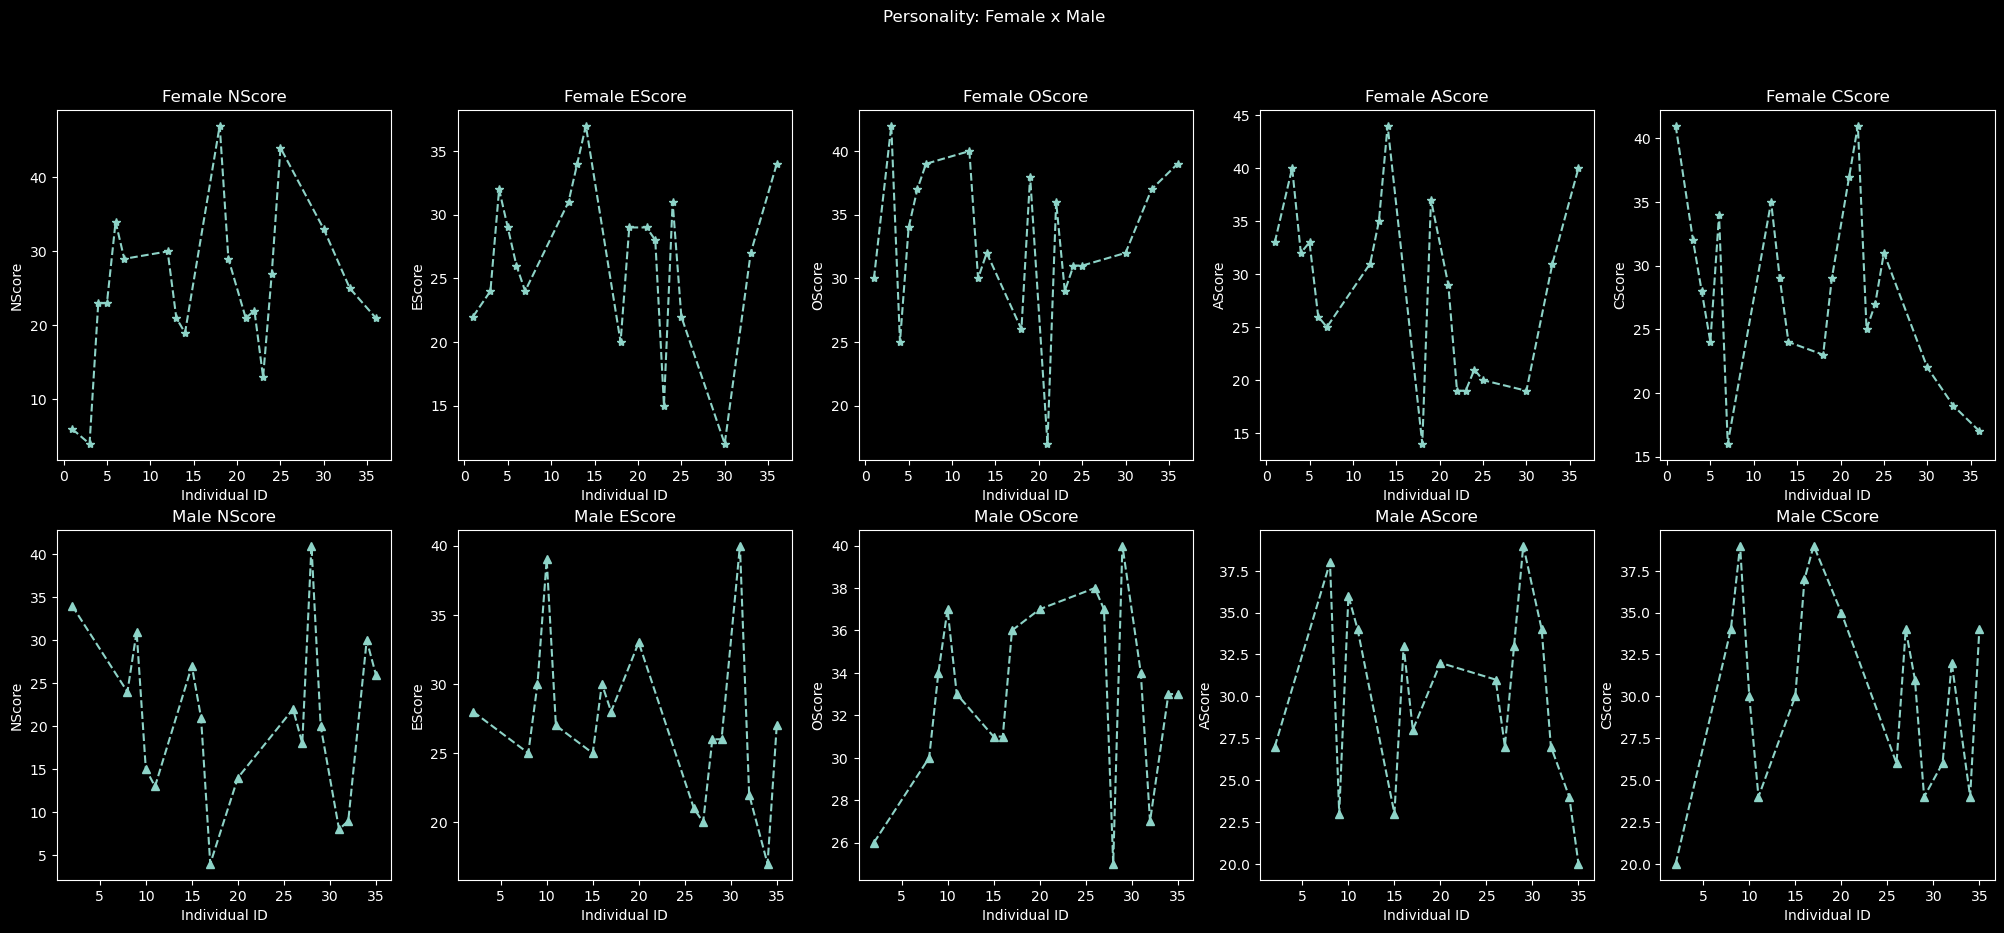

In [28]:
fig, ax = plt.subplots(2, 5, figsize = (25, 10), sharey = False, sharex = False)

xM = maleDF.ID; xF = femaleDF.ID
yMN = maleDF.Neuroticism; yFN = femaleDF.Neuroticism
yME = maleDF.Extraversion; yFE = femaleDF.Extraversion
yMO = maleDF.Openness; yFO = femaleDF.Openness
yMA = maleDF.Agreeableness; yFA = femaleDF.Agreeableness
yMC = maleDF.Conscientiousness; yFC = femaleDF.Conscientiousness

fig.suptitle('Personality: Female x Male')

ax[0, 0].set_title("Female NScore"); ax[0, 1].set_title("Female EScore"); ax[0, 2].set_title("Female OScore"); ax[0, 3].set_title("Female AScore"); ax[0, 4].set_title("Female CScore")
ax[1, 0].set_title("Male NScore"); ax[1, 1].set_title("Male EScore"); ax[1, 2].set_title("Male OScore"); ax[1, 3].set_title("Male AScore"); ax[1, 4].set_title("Male CScore")

ax[0, 0].set_ylabel('NScore'); ax[0, 0].set_xlabel("Individual ID"); 
ax[0, 1].set_ylabel('EScore'); ax[0, 1].set_xlabel("Individual ID"); 
ax[0, 2].set_ylabel('OScore'); ax[0, 2].set_xlabel("Individual ID"); 
ax[0, 3].set_ylabel('AScore'); ax[0, 3].set_xlabel("Individual ID"); 
ax[0, 4].set_ylabel('CScore'); ax[0, 4].set_xlabel("Individual ID"); 

ax[1, 0].set_xlabel("Individual ID"); ax[1, 0].set_ylabel('NScore');
ax[1, 1].set_ylabel('EScore'); ax[1, 1].set_xlabel("Individual ID");
ax[1, 2].set_ylabel('OScore'); ax[1, 2].set_xlabel("Individual ID");
ax[1, 3].set_ylabel('AScore'); ax[1, 3].set_xlabel("Individual ID");
ax[1, 4].set_ylabel('CScore'); ax[1, 4].set_xlabel("Individual ID");

ax[0, 0].plot(xF, yFN, "*--"); ax[0, 1].plot(xF, yFE, "*--"); ax[0, 2].plot(xF, yFO, "*--"); ax[0, 3].plot(xF, yFA, "*--"); ax[0, 4].plot(xF, yFC, "*--");

ax[1, 0].plot(xM, yMN, "^--"); ax[1, 1].plot(xM, yME, "^--"); ax[1, 2].plot(xM, yMO, "^--"); ax[1, 3].plot(xM, yMA, "^--"); ax[1, 4].plot(xM, yMC, "^--")

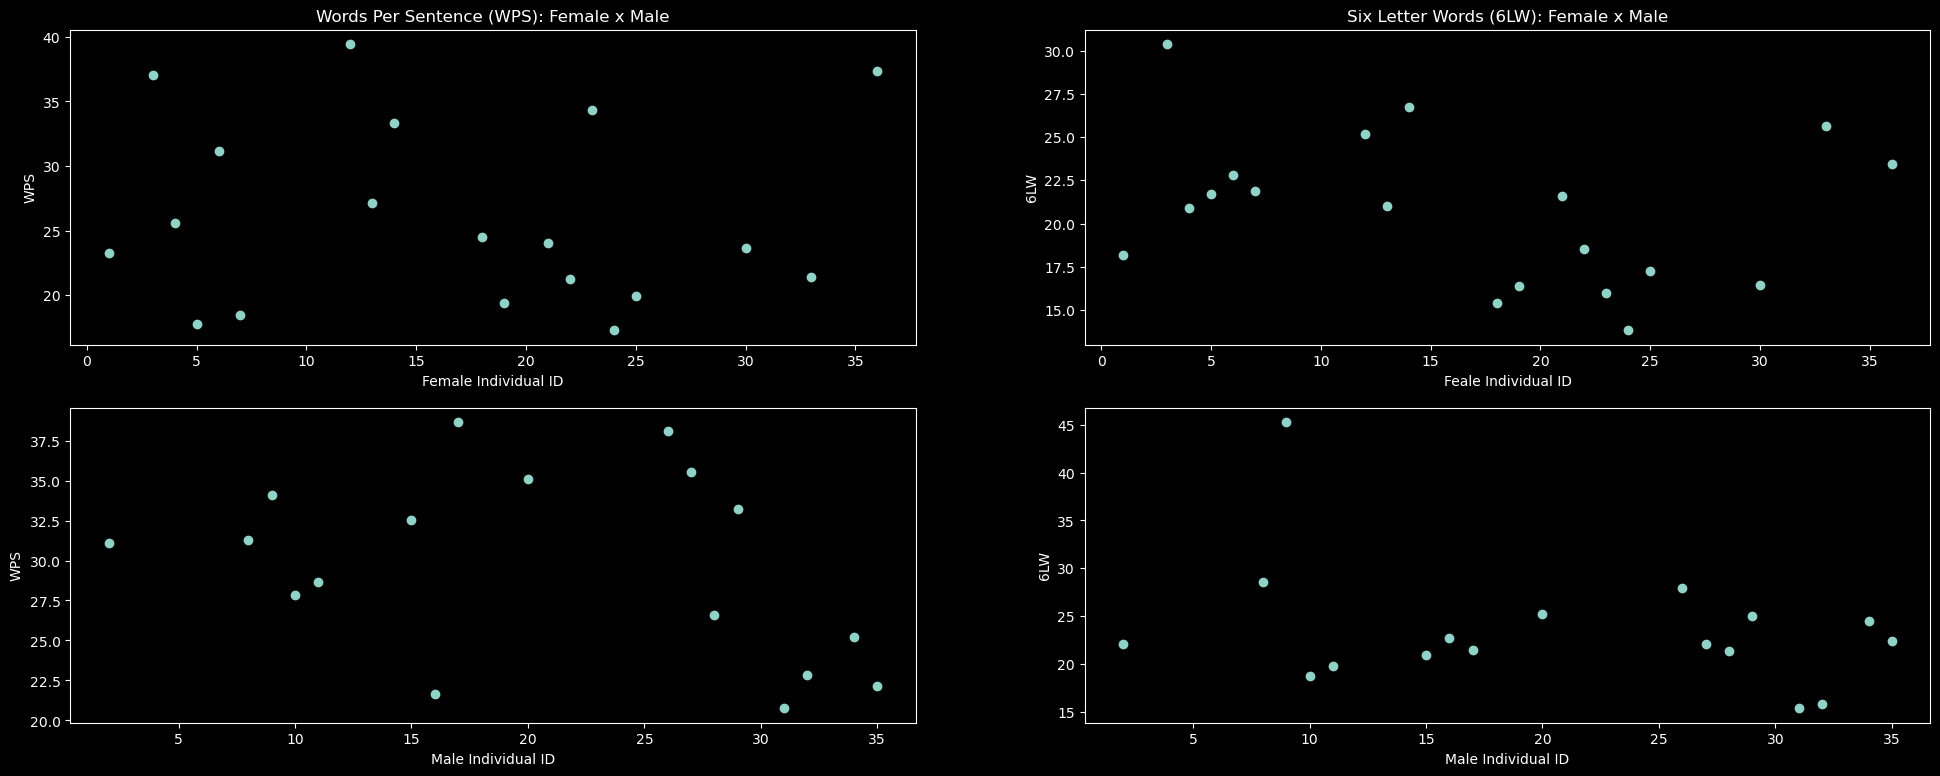

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (24, 9), sharey = False, sharex = False)

ax[0, 0].set_title("Words Per Sentence (WPS): Female x Male")

ax[0, 0].set_xlabel("Female Individual ID")
ax[0, 0].set_ylabel("WPS")
ax[1, 0].set_xlabel("Male Individual ID")
ax[1, 0].set_ylabel("WPS")

ax[0, 0].scatter(xF, femaleDF["Six Letter"]) 
ax[1, 0].scatter(xM, maleDF["Six Letter"])

ax[0, 1].set_title("Six Letter Words (6LW): Female x Male")

ax[0, 1].set_xlabel("Feale Individual ID")
ax[0, 1].set_ylabel("6LW")
ax[1, 1].set_xlabel("Male Individual ID")
ax[1, 1].set_ylabel("6LW")

ax[0, 1].scatter(xF, femaleDF.WPS) 
ax[1, 1].scatter(xM, maleDF.WPS)

plt.show();

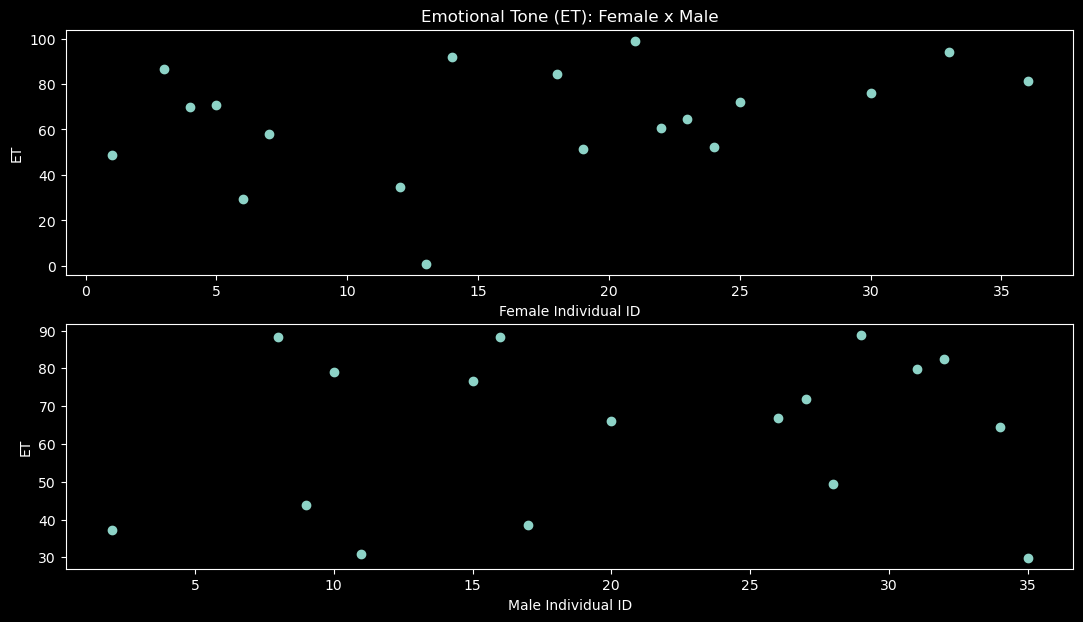

In [30]:
fig, ax = plt.subplots(2, 1, figsize = (13, 7), sharey = False, sharex = False)

ax[0].set_title("Emotional Tone (ET): Female x Male")

ax[0].set_xlabel("Female Individual ID")
ax[0].set_ylabel("ET")
ax[1].set_xlabel("Male Individual ID")
ax[1].set_ylabel("ET")

ax[0].scatter(xF, femaleDF["Emotional Tone"]) 
ax[1].scatter(xM, maleDF["Emotional Tone"])

plt.show();

# <span style = "color:red"> REQ 2 </span>

- (2) For each person, create categorical personality variables that follow:

    - a. Overall personality – Assign each person an overall personality trait. 
        - This could be operationalized as their trait with the highest score, or you may think of another way to define this.

    - b. Categorical score for each personality trait – Assign each person a high/medium/low score for each trait. 
        - This should be coded into new variables (and not recoded into the current numeric ones). 

In [31]:
# Dominant Personality Trait
#n = "Neurotic"
#e = "Extraverted"
#o = "Open"
#a = "Agreeable"
#c = "Conscientious"

# Personality Category
#High: >= 32
#Medium: >= 16 &&  <= 31
#Low: <= 15

fPersonaII = femaleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]];
mPersonaII = maleDF[["ID", "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]];

for i, r in fPersonaII[["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]].iterrows():
    
    print("Index: ", i, "  Max Value: ", r.max(), " Column: ", r.idxmax())

Index:  0   Max Value:  41  Column:  Conscientiousness
Index:  1   Max Value:  42  Column:  Openness
Index:  2   Max Value:  32  Column:  Extraversion
Index:  3   Max Value:  34  Column:  Openness
Index:  4   Max Value:  37  Column:  Openness
Index:  5   Max Value:  39  Column:  Openness
Index:  6   Max Value:  40  Column:  Openness
Index:  7   Max Value:  35  Column:  Agreeableness
Index:  8   Max Value:  44  Column:  Agreeableness
Index:  9   Max Value:  47  Column:  Neuroticism
Index:  10   Max Value:  38  Column:  Openness
Index:  11   Max Value:  37  Column:  Conscientiousness
Index:  12   Max Value:  41  Column:  Conscientiousness
Index:  13   Max Value:  29  Column:  Openness
Index:  14   Max Value:  31  Column:  Extraversion
Index:  15   Max Value:  44  Column:  Neuroticism
Index:  16   Max Value:  33  Column:  Neuroticism
Index:  17   Max Value:  37  Column:  Openness
Index:  18   Max Value:  40  Column:  Agreeableness


In [32]:
# https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
# https://datatofish.com/if-condition-in-pandas-dataframe/
# https://queirozf.com/entries/pandas-dataframe-examples-styling-cells-and-conditional-formatting

print("Female: Personality Matrix")

fPersonaII.loc[:,"Personality Max"] = fPersonaII[["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]].max(axis = 1);

fPersonaII.loc[:, "Dominant Personality"] = fPersonaII[["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]].idxmax(axis = 1);

fPersonaII['NScore'] = fPersonaII["Neuroticism"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

fPersonaII['EScore'] = fPersonaII["Extraversion"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

fPersonaII['AScore'] = fPersonaII["Openness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

fPersonaII['OScore'] = fPersonaII["Agreeableness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

fPersonaII['CScore'] = fPersonaII["Conscientiousness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")


def scoreColor(fPersonaII):
    r1 = 'background-color: darkred;'
    r2 = 'background-color: red;'     
    r3 = 'background-color: salmon;'

    return [r1 if i == "HIGH" else r2 if i == "MEDIUM" else r3 for i in fPersonaII]  

def personaColor(fPersonaII):
    c1 = 'background-color: purple;'
    c2 = 'background-color: olive;'     
    c3 = 'background-color: teal;'
    c4 = 'background-color: darkorange;'     
    c5 = 'background-color: slategrey;'

    return [c1 if i == "Neuroticism" else c2 if i == "Extraversion" else c3 if i == "Openness" else c4 if i == "Agreeableness" else c5 for i in fPersonaII]  

fPersonaII.style.highlight_max(subset = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"], axis = 1, props = 'color: powderblue; font-weight:bold; background-color: midnightblue;')\
.highlight_min(subset = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"], axis = 1, props = 'color: midnightblue; font-weight:bold; background-color: powderblue;')\
.apply(scoreColor, axis = 0, subset = ["NScore", "EScore", "AScore", "OScore", "CScore"])\
.apply(personaColor, axis = 0, subset = ["Dominant Personality"])


Female: Personality Matrix


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Personality Max,Dominant Personality,NScore,EScore,AScore,OScore,CScore
0,1,6,22,30,33,41,41,Conscientiousness,LOW,MEDIUM,MEDIUM,HIGH,HIGH
1,3,4,24,42,40,32,42,Openness,LOW,MEDIUM,HIGH,HIGH,HIGH
2,4,23,32,25,32,28,32,Extraversion,MEDIUM,HIGH,MEDIUM,HIGH,MEDIUM
3,5,23,29,34,33,24,34,Openness,MEDIUM,MEDIUM,HIGH,HIGH,MEDIUM
4,6,34,26,37,26,34,37,Openness,HIGH,MEDIUM,HIGH,MEDIUM,HIGH
5,7,29,24,39,25,16,39,Openness,MEDIUM,MEDIUM,HIGH,MEDIUM,MEDIUM
6,12,30,31,40,31,35,40,Openness,MEDIUM,MEDIUM,HIGH,MEDIUM,HIGH
7,13,21,34,30,35,29,35,Agreeableness,MEDIUM,HIGH,MEDIUM,HIGH,MEDIUM
8,14,19,37,32,44,24,44,Agreeableness,MEDIUM,HIGH,HIGH,HIGH,MEDIUM
9,18,47,20,26,14,23,47,Neuroticism,HIGH,MEDIUM,MEDIUM,LOW,MEDIUM


In [33]:
print("Male: Personality Matrix")

mPersonaII.loc[:, "Personality Max"] = mPersonaII[["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]].max(axis = 1);

mPersonaII.loc[:, "Dominant Personality"] = mPersonaII[["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"]].idxmax(axis = 1);

mPersonaII['NScore'] = mPersonaII["Neuroticism"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

mPersonaII['EScore'] = mPersonaII["Extraversion"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

mPersonaII['AScore'] = mPersonaII["Openness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

mPersonaII['OScore'] = mPersonaII["Agreeableness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

mPersonaII['CScore'] = mPersonaII["Conscientiousness"].apply(
    lambda x: "LOW" if (x <= 15) else "HIGH" if (x >= 32) else "MEDIUM")

def scoreColor(mPersonaII):
    r1 = 'background-color: darkred;'
    r2 = 'background-color: red;'     
    r3 = 'background-color: salmon;'

    return [r1 if i == "HIGH" else r2 if i == "MEDIUM" else r3 for i in mPersonaII]  

def personaColor(mPersonaII):
    c1 = 'background-color: purple;'
    c2 = 'background-color: olive;'     
    c3 = 'background-color: teal;'
    c4 = 'background-color: darkorange;'     
    c5 = 'background-color: slategrey;'

    return [c1 if i == "Neuroticism" else c2 if i == "Extraversion" else c3 if i == "Openness" else c4 if i == "Agreeableness" else c5 for i in mPersonaII]  

mPersonaII.style.highlight_max(subset = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"], axis = 1, props = 'color: powderblue; font-weight:bold; background-color: midnightblue;')\
.highlight_min(subset = ["Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness"], axis = 1, props = 'color: midnightblue; font-weight:bold; background-color: powderblue;')\
.apply(scoreColor, axis = 0, subset = ["NScore", "EScore", "AScore", "OScore", "CScore"])\
.apply(personaColor, axis = 0, subset = ["Dominant Personality"])

# https://queirozf.com/entries/pandas-dataframe-examples-styling-cells-and-conditional-formatting


Male: Personality Matrix


,ID,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Personality Max,Dominant Personality,NScore,EScore,AScore,OScore,CScore
0,2,34,28,26,27,20,34,Neuroticism,HIGH,MEDIUM,MEDIUM,MEDIUM,MEDIUM
1,8,24,25,30,38,34,38,Agreeableness,MEDIUM,MEDIUM,MEDIUM,HIGH,HIGH
2,9,31,30,34,23,39,39,Conscientiousness,MEDIUM,MEDIUM,HIGH,MEDIUM,HIGH
3,10,15,39,37,36,30,39,Extraversion,LOW,HIGH,HIGH,HIGH,MEDIUM
4,11,13,27,33,34,24,34,Agreeableness,LOW,MEDIUM,HIGH,HIGH,MEDIUM
5,15,27,25,31,23,30,31,Openness,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM
6,16,21,30,31,33,37,37,Conscientiousness,MEDIUM,MEDIUM,MEDIUM,HIGH,HIGH
7,17,4,28,36,28,39,39,Conscientiousness,LOW,MEDIUM,HIGH,MEDIUM,HIGH
8,20,14,33,37,32,35,37,Openness,LOW,HIGH,HIGH,HIGH,HIGH
9,26,22,21,38,31,26,38,Openness,MEDIUM,MEDIUM,HIGH,MEDIUM,MEDIUM


# <span style = "color:red"> REQ 3 </span>


- (3) Present 3 different hypotheses (linguistic cues & personality)
    - For each, run the appropriate statistical test to support/refute. Report your findings

In [34]:
#maleDF.style
#femaleDF.style

In [35]:
femaleTest = femaleDF[["ID", "Agreeableness", "Conscientiousness","WPS", "Six Letter", "motion"]]

fPC = fP.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("green", as_cmap = True);

fPC.style.background_gradient(cmap = cdCorrColorMap)

femaleTest;

### Hypothesis 1:

* Statement:

    * I believe that the female students in the study that have a higher Agreeableness personality Ascore will also have a high Words Per Second (WPS) score due to using more words to express their softhearted, trusting, and helpful traits (According to Big Five Factor Model table 12.2 slide).

* Report:

    * I ran correlations (.corr()) on AScore and WPS for Females and got 0.7, which is close to 1.0, signifying some level of correlation between the two. 
    * My regression also has a positive slope
    * I ran both Shapiro and (.pvalue) to get my p-value, both gave me ~0.008. Since this is less than 0.05, I believe this means there is a statistical significance.


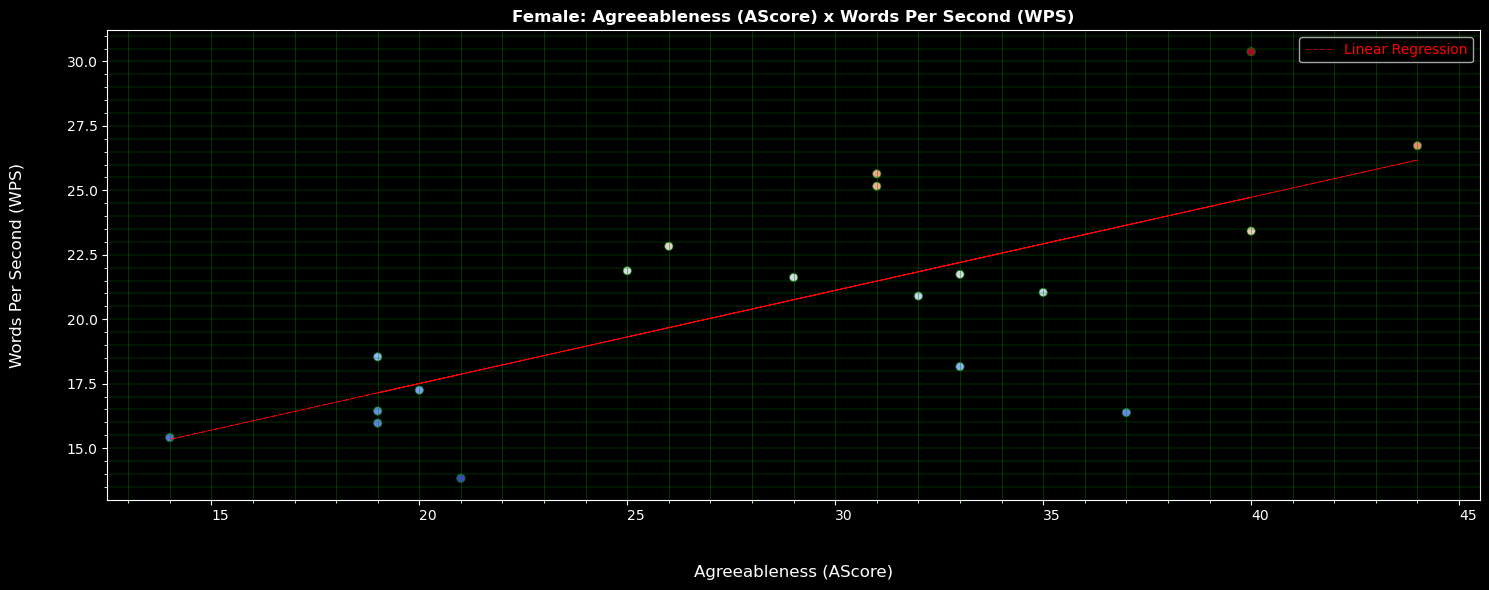


 ShapiroResult(statistic=0.6077200174331665, pvalue=0.0007929147104732692) 

Coefficient of Determination (r squared): 0.493
Slope: 0.36129
R-Value: 0.70
Intercept: 10.28
P-Value: 0.00080740
Standard Error: 0.09
Mean AScore:  28.84
Mean WPS:  20.701
Standard Deviation - AScore:  8.31
Standard Deviation - WPS:  4.274 



In [36]:
# *****************
#  Female Test I
# ****************
xfTest = femaleTest.Agreeableness
yfTest = femaleTest.WPS

fig, ax = plt.subplots(figsize = (15, 6))

scatter1 = ax.scatter(xfTest, yfTest, c = yfTest * .2, cmap = "coolwarm", alpha = .99, edgecolors = "g", lw = .5)

#cbar = plt.colorbar(scatter1, location = "right", pad = 0.005, aspect = 50) #shrink = .8)

################################################################################################################################################
#  Model / Linear Regression
################################################################################################################################################
testRegression = stats.linregress(xfTest, yfTest)

formula = testRegression.slope * xfTest
plt.plot(xfTest, testRegression.intercept + formula, 'r', ls = 'dashdot', lw = .5,  label = 'Linear Regression') #color = "crimson", 

################################################################################################################################################
# Labels
################################################################################################################################################
ax.set_title("Female: Agreeableness (AScore) x Words Per Second (WPS)", fontweight = "bold", fontsize = 12, horizontalalignment = 'center', color = 'white')
ax.set_xlabel("Agreeableness (AScore)",  fontsize = 12, labelpad = 30, color = 'white')
ax.set_ylabel("Words Per Second (WPS)", fontsize = 12, labelpad = 30, color = 'white')
plt.legend(fontsize = 10, labelcolor = 'red', loc = "upper right")

################################################################################################################################################
# Ticks
################################################################################################################################################
ax.minorticks_on()
plt.xticks(fontsize = 10, ha = "left")
plt.yticks(fontsize = 10, ha = "right")

################################################################################################################################################
# Margins, Grid
################################################################################################################################################
ax.grid(which = 'both', axis = "y", color = "g", ls = '-', lw = .25)
ax.grid(which = 'minor', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)
ax.grid(which = 'major', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)

fig.tight_layout()
plt.show();

################################################################################################################################################

tttt = stats.shapiro(testRegression)
print("\n", tttt, "\n")

# print("Slope & Intercept: ", np.polyfit(xfTest, yfTest, 1))

print(f"Coefficient of Determination (r squared): {testRegression.rvalue ** 2:.3f}")
print(f"Slope: {testRegression.slope:.5f}")
print(f"R-Value: {testRegression.rvalue:.2f}")
print(f"Intercept: {testRegression.intercept:.2f}")
print(f"P-Value: {testRegression.pvalue:.8f}")
print(f"Standard Error: {testRegression.stderr:.2f}")
print(f"Mean AScore: ", round(np.mean(xfTest), 2))
print(f"Mean WPS: ", round(np.mean(yfTest), 3))
print(f"Standard Deviation - AScore: ", round(np.std(xfTest), 2))
print(f"Standard Deviation - WPS: ", round(np.std(yfTest), 3), "\n")
################################################################################################################################################


In [37]:
maleTest = maleDF[["ID", "Neuroticism", "Extraversion", "drives", "family", "female", "sexual","home", "SemiC", "Apostro"]]

mPC = mP.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mPC.style.background_gradient(cmap = cdCorrColorMap);

maleTest;

### Hypothesis 2:

* Statement:

    * I believe males will show a correlation between their extroverted personality and the inclination to mention family (daughter, dad, aunt).

* Report:
    * I ran correlations (.corr()) on EScore and Family for Males. It read 0.7, which is close to 1.0, signifying some level of correlation between the two. 
    * My regression returned an increasing trend line 
    * I ran both Shapiro: p-value == 0.027 and .pvalue() == 0.002. I'm not sure why I got different values for both, but they are less than 0.05. I believe this means there is a statistical significance.

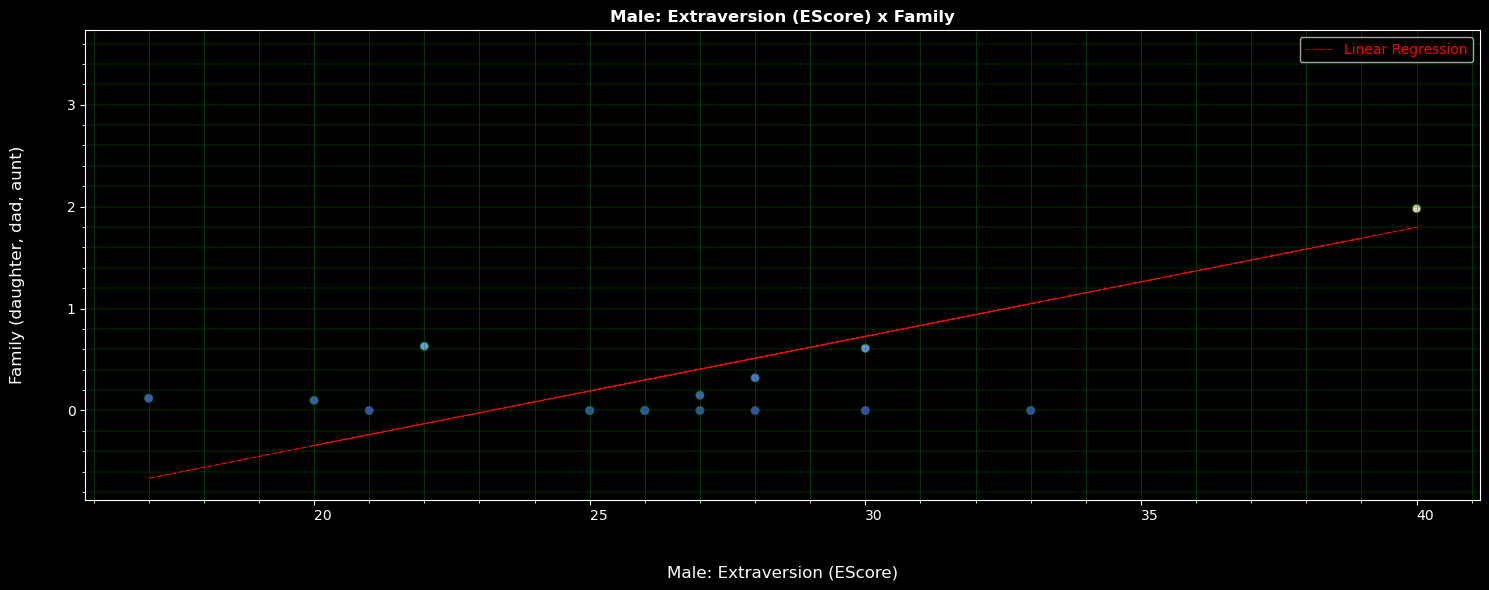


 ShapiroResult(statistic=0.7467691898345947, pvalue=0.027774322777986526) 

Coefficient of Determination (r squared): 0.482
Slope: 0.10705
R-Value: 0.69
Intercept: -2.48
P-Value: 0.00200106
Standard Error: 0.03
Mean EScore:  27.29
Mean Family Text:  0.437
Standard Deviation - EScore:  5.88
Standard Deviation - Family Text:  0.907 



In [38]:
# *****************
#  Male Test I
# ****************
xmTest = maleTest.Extraversion
ymTest = maleTest.family

fig, ax = plt.subplots(figsize = (15, 6))

scatter2 = ax.scatter(xmTest, ymTest, c = ymTest * .2, cmap = "coolwarm", alpha = .99, edgecolors = "g", lw = .5)

#cbar = plt.colorbar(scatter1, location = "right", pad = 0.005, aspect = 50) #shrink = .8)

################################################################################################################################################
#  Model / Linear Regression
################################################################################################################################################
testRegressionM = stats.linregress(xmTest, ymTest)

formulaM = testRegressionM.slope * xmTest
plt.plot(xmTest, testRegressionM.intercept + formulaM, 'r', ls = 'dashdot', lw = .5,  label = 'Linear Regression') #color = "crimson", 

################################################################################################################################################
# Labels
################################################################################################################################################
ax.set_title("Male: Extraversion (EScore) x Family", fontweight = "bold", fontsize = 12, horizontalalignment = 'center', color = 'white')
ax.set_xlabel("Male: Extraversion (EScore)",  fontsize = 12, labelpad = 30, color = 'white')
ax.set_ylabel("Family (daughter, dad, aunt)", fontsize = 12, labelpad = 30, color = 'white')
plt.legend(fontsize = 10, labelcolor = 'red', loc = "upper right")
################################################################################################################################################
# Ticks
################################################################################################################################################
ax.minorticks_on()
plt.xticks(fontsize = 10, ha = "left")
plt.yticks(fontsize = 10, ha = "right")

################################################################################################################################################
# Margins, Grid
################################################################################################################################################
ax.grid(which = 'both', axis = "y", color = "g", ls = '-', lw = .25)
ax.grid(which = 'minor', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)
ax.grid(which = 'major', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)

fig.tight_layout()
plt.show();

################################################################################################################################################

ttt = stats.shapiro(testRegressionM)
print("\n", ttt, "\n")

print(f"Coefficient of Determination (r squared): {testRegressionM.rvalue ** 2:.3f}")
print(f"Slope: {testRegressionM.slope:.5f}")
print(f"R-Value: {testRegressionM.rvalue:.2f}")
print(f"Intercept: {testRegressionM.intercept:.2f}")
print(f"P-Value: {testRegressionM.pvalue:.8f}")
print(f"Standard Error: {testRegressionM.stderr:.2f}")
print(f"Mean EScore: ", round(np.mean(xmTest), 2))
print(f"Mean Family Text: ", round(np.mean(ymTest), 3))
print(f"Standard Deviation - EScore: ", round(np.std(xmTest), 2))
print(f"Standard Deviation - Family Text: ", round(np.std(ymTest), 3), "\n")
################################################################################################################################################



### Hypothesis 3:

* Statement:

    * I believe both males and females will focus heavily on time oriented matters, like the past, if they are also neurotic individuals. 

* Report:
  * I ran correlations (.corr()) on NScore and Focus Past for Females and Males. It read 0.14, which is far from 1.0, signifying no correlation between the two. 
  * My regression returned a slightly increasing trend line, with a very tiny positive slope, but I will focus on the numbers.
  * I ran both Shapiro: p-value == 0.002 and .pvalue() == 0.41. I'm not sure why I got different values for both, again. I will defer to the .pvalue() reading, and since it is more than 0.05, I will confirm there is no statistical significance. 

In [42]:

allTest = CDtestRun[["ID #", "Gender", "Nscore", "drives", "focuspast", "focuspresent", "focusfuture"]]

mfTest = allTest.corr(method = "pearson", numeric_only = True)

cdCorrColorMap = sns.light_palette("black", as_cmap = True);

mfTest.style.background_gradient(cmap = cdCorrColorMap)

allTest;

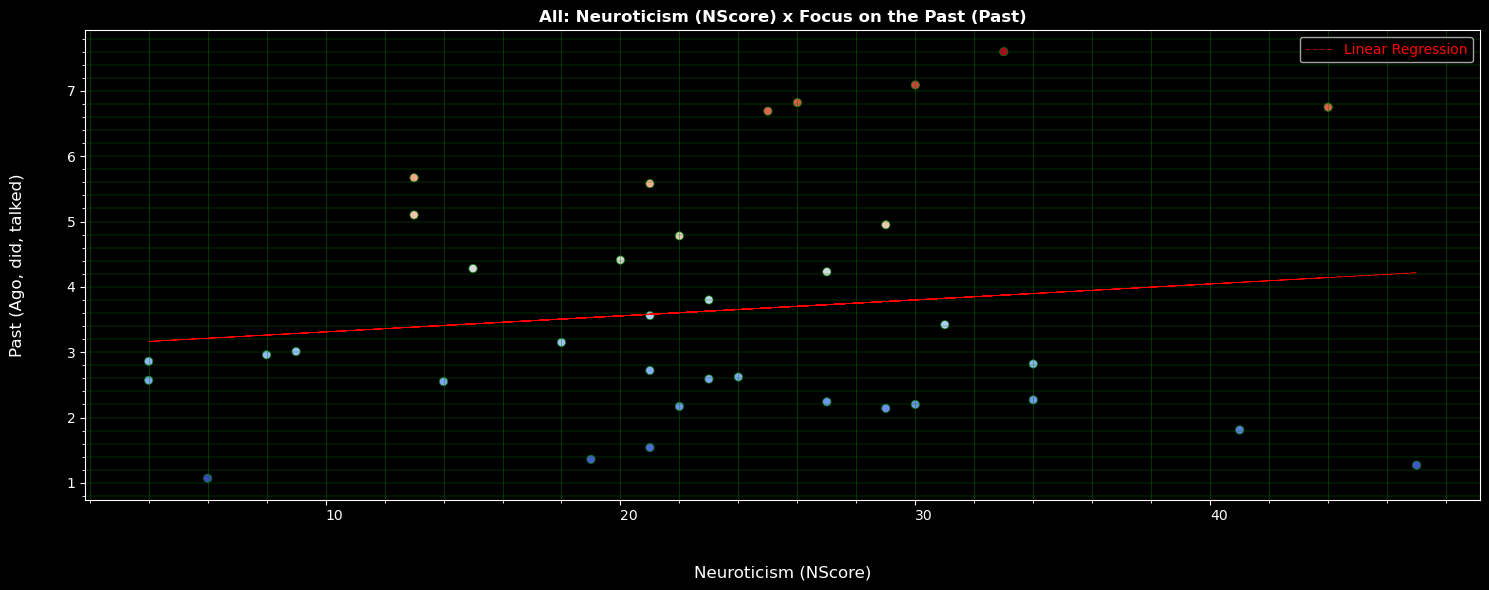


 ShapiroResult(statistic=0.6481430530548096, pvalue=0.002531249774619937) 

Coefficient of Determination (r squared): 0.020
Slope: 0.02445
R-Value: 0.14
Intercept: 3.07
P-Value: 0.41169833
Standard Error: 0.03
Mean NScore:  23.0
Mean Focus Past:  3.629
Standard Deviation - NScore:  10.28
Standard Deviation - FocusPast:  1.782 



In [40]:
# *****************
#  Male Test I
# ****************
xTest = allTest.Nscore
yTest = allTest.focuspast

fig, ax = plt.subplots(figsize = (15, 6))

scatter3 = ax.scatter(xTest, yTest, c = yTest * .2, cmap = "coolwarm", alpha = .99, edgecolors = "g", lw = .5)

#cbar = plt.colorbar(scatter1, location = "right", pad = 0.005, aspect = 50) #shrink = .8)

################################################################################################################################################
#  Model / Linear Regression
################################################################################################################################################
testRegressionA = stats.linregress(xTest, yTest)

formulaA = testRegressionA.slope * xTest
plt.plot(xTest, testRegressionA.intercept + formulaA, 'r', ls = 'dashdot', lw = .5,  label = 'Linear Regression') #color = "crimson", 

################################################################################################################################################
# Labels
################################################################################################################################################
ax.set_title("All: Neuroticism (NScore) x Focus on the Past (Past)", fontweight = "bold", fontsize = 12, horizontalalignment = 'center', color = 'white')
ax.set_xlabel("Neuroticism (NScore)",  fontsize = 12, labelpad = 30, color = 'white')
ax.set_ylabel("Past (Ago, did, talked)", fontsize = 12, labelpad = 30, color = 'white')
plt.legend(fontsize = 10, labelcolor = 'red', loc = "upper right")

################################################################################################################################################
# Ticks
################################################################################################################################################
ax.minorticks_on()
plt.xticks(fontsize = 10, ha = "left")
plt.yticks(fontsize = 10, ha = "right")

################################################################################################################################################
# Margins, Grid
################################################################################################################################################
ax.grid(which = 'both', axis = "y", color = "g", ls = '-', lw = .25)
ax.grid(which = 'minor', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)
ax.grid(which = 'major', axis = "x", color = "g", ls = '-', lw = .6, alpha = .5)

fig.tight_layout()
plt.show();

################################################################################################################################################

tt = stats.shapiro(testRegressionA)
print("\n", tt, "\n")

print(f"Coefficient of Determination (r squared): {testRegressionA.rvalue ** 2:.3f}")
print(f"Slope: {testRegressionA.slope:.5f}")
print(f"R-Value: {testRegressionA.rvalue:.2f}")
print(f"Intercept: {testRegressionA.intercept:.2f}")
print(f"P-Value: {testRegressionA.pvalue:.8f}")
print(f"Standard Error: {testRegressionA.stderr:.2f}")
print(f"Mean NScore: ", round(np.mean(xTest), 2))
print(f"Mean Focus Past: ", round(np.mean(yTest), 3))
print(f"Standard Deviation - NScore: ", round(np.std(xTest), 2))
print(f"Standard Deviation - FocusPast: ", round(np.std(yTest), 3), "\n")
################################################################################################################################################
